Name: Malhar Jadhav

PRN: 1132210397

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 28.1 MB/s 


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [24]:
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras import layers
from keras_tuner.tuners import RandomSearch

In [13]:
df = pd.read_csv("/content/data.csv")

In [14]:
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2246,433000.0000,3,1.75,1870,7189,1.0,0,0,3,1270,600,1959,1989,6811 51st Ave S,Seattle,WA 98118,USA
324,262000.0000,4,2.50,2020,6236,2.0,0,0,3,2020,0,2002,0,434 Pullman Ave,Algona,WA 98001,USA
3165,312891.0000,5,3.00,2300,8214,2.0,0,0,3,2300,0,2013,1923,33027 47th Pl S,Federal Way,WA 98001,USA
4466,423050.9259,2,1.00,890,4590,1.0,0,0,3,890,0,1923,1998,332 NW 84th St,Seattle,WA 98117,USA
1937,425000.0000,4,2.75,2440,15349,2.0,0,1,4,2440,0,1957,2001,21212 Occidental Ave S,Des Moines,WA 98198,USA


In [15]:
df.shape

(4600, 17)

In [16]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [17]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(3), int64(10), object(4)
memory usage: 61

In [19]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

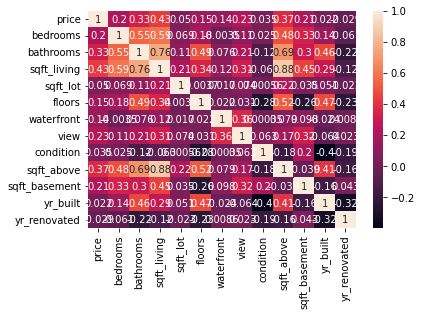

In [25]:
sns.heatmap(df.corr(), annot=True)

In [26]:
one_hot_encoded_df = pd.get_dummies(df)

In [27]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]
y = df['price']

In [28]:
X.shape

(4600, 12)

In [30]:
y.shape

(4600,)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [36]:
X = mx.fit_transform(X)
y= mx.fit_transform(y.values.reshape(-1,1))

In [37]:
def build_model(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layers', 2, 20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,
    max_value=512,step=32),
    activation='relu'))
  model.add(layers.Dense(1, activation='linear'))

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                loss='mean_absolute_error',
                metrics=['mean_absolute_error'])
  return model

In [38]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Power_Consumption')

In [39]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [40]:
tuner.search(X,y, epochs=5 , validation_split=0.2)

Trial 5 Complete [00h 00m 10s]
val_mean_absolute_error: 0.009013735999663671

Best val_mean_absolute_error So Far: 0.009013735999663671
Total elapsed time: 00h 00m 55s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [41]:
tuner.results_summary()

Results summary
Results in project1/Power_Consumption
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 10
units_0: 416
units_1: 416
learning_rate: 0.0001
units_2: 448
units_3: 480
units_4: 128
units_5: 160
units_6: 128
units_7: 96
units_8: 96
units_9: 224
units_10: 512
units_11: 96
units_12: 320
units_13: 128
units_14: 288
Score: 0.009013735999663671
Trial summary
Hyperparameters:
num_layers: 15
units_0: 384
units_1: 320
learning_rate: 0.001
units_2: 288
units_3: 448
units_4: 352
units_5: 128
units_6: 192
units_7: 416
units_8: 256
units_9: 352
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 0.00909155048429966
Trial summary
Hyperparameters:
num_layers: 10
units_0: 64
units_1: 224
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
Score: 0.00926472277690967
Trial summary
Hyperparameters:
num_layers: 4
units_0: 224
units_1: 288
learning_rate: 0.001
units_2: 224
units_3: 384
units_4